<a href="https://colab.research.google.com/github/niagayoara/machine_learning/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets


LOAD DATASET

In [2]:
diabetes = datasets.load_diabetes()


In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

Description of the Diabetes dataset

In [4]:

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee


Feature names

In [5]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']



Create X and Y data matrices

In [6]:
X = diabetes.data
Y = diabetes.target

In [7]:

X.shape, Y.shape

((442, 10), (442,))


Load dataset + Create X and Y data matrices (in 1 step)

In [8]:
X, Y = datasets.load_diabetes(return_X_y=True)

In [9]:
X.shape, Y.shape

((442, 10), (442,))


Import library

In [10]:
import pandas as pd


Download CSV from GitHub

In [11]:
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2025-09-25 01:01:50--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2025-09-25 01:01:50--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  35.39K  --.-KB/s    in 0s      

2025-09-25 01:01:50 (114 MB/s) - ‘BostonHousing.csv’ saved [36242/36242]



Read in CSV file

In [12]:
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Split dataset to X and Y variables

In [13]:
Y = BostonHousing.medv
Y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [14]:
X = BostonHousing.drop(['medv'], axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


Data split


Import library

In [15]:
from sklearn.model_selection import train_test_split

Perform 80/20 Data split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


Data dimension

In [17]:
X_train.shape, Y_train.shape

((404, 13), (404,))

In [18]:
X_test.shape, Y_test.shape

((102, 13), (102,))

LINEAR REGRESSION MODEL


Import library

In [19]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


Build linear regression


Defines the regression model

In [20]:
model = linear_model.LinearRegression()



Build training model

In [21]:
model.fit(X_train, Y_train)

LinearRegression()

Apply trained model to make prediction (on test set)

In [22]:
Y_pred = model.predict(X_test)


Prediction results


Print model performance

In [23]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-1.20707089e-01  5.92530911e-02  3.23166436e-03  2.18303895e+00
 -1.92825567e+01  3.34969147e+00  1.66863933e-02 -1.48833929e+00
  3.36322880e-01 -1.35318401e-02 -9.07668637e-01  9.40963156e-03
 -5.55214589e-01]
Intercept: 39.14694596675276
Mean squared error (MSE): 20.24
Coefficient of determination (R^2): 0.75



String formatting

In [24]:

r2_score(Y_test, Y_pred)

0.7507518303962308

In [25]:
import numpy as np

In [26]:
np.array(r2_score(Y_test, Y_pred)).dtype

dtype('float64')


We will be using the modulo operator to format the numbers by rounding it off.

In [27]:
'%f' % 0.523810833536016

'0.523811'


We will now round it off to 3 digits

In [28]:


'%.3f' % 0.523810833536016

'0.524'


We will now round it off to 2 digits

In [29]:
'%.2f' % 0.523810833536016


'0.52'


Scatter plots



Import library

In [30]:


import seaborn as sns


Make scatter plot

In [31]:


Y_test

,medv
499,17.5
219,23.0
178,29.9
300,24.8
11,18.9
...,...
163,50.0
44,21.2
15,19.9
272,24.4


In [32]:
import numpy as np
np.array(Y_test)

array([17.5, 23. , 29.9, 24.8, 18.9, 27.5, 17.2,  8.3, 18.9, 19. , 23.8,
       20.5, 12.3, 22.2, 23.2, 46.7, 28.7, 20.4, 26.6, 19. , 30.7,  8.4,
       19.2, 19.4, 20.3, 33.1, 19.1,  8.5, 19.9, 23.9, 21.7, 23.8, 15.6,
       20.1, 21.1, 20.3,  8.8, 29.8, 23.7, 23.9, 15. , 23. , 18.3, 20.4,
       37.6, 22.2, 25. , 29. , 18.7, 21.5, 23.7, 21.6,  7.2, 28.5, 22.1,
       31.6, 30.3, 13.3, 14.2,  5. , 13.6, 24.4, 14.9, 32.5, 20.8, 14.5,
       50. , 50. , 50. , 21.8, 26.6, 19.6, 18.8, 23.1, 23.9, 19.8, 13.3,
       12.1, 16.6, 16.2, 28.6, 24.8, 50. ,  8.8, 14.3, 21.4, 22. , 13.1,
       19.3, 24.1, 18.9, 13.3, 19.4, 25. , 17.3, 20.6, 19.6, 50. , 21.2,
       19.9, 24.4, 22.6])

In [33]:
Y_pred

array([18.82557554, 29.5756067 , 31.64782044, 31.45120559, 22.08259338,
       31.87058127, 14.91089528,  9.95288181, 24.38612881, 21.51231409,
       26.42953018, 20.82198852, 13.44331324, 19.32123214, 27.64711917,
       34.53734608, 25.66172648, 19.95398162, 27.27457874, 14.60644536,
       31.21795944, 13.95441202, 24.08040117, 23.44389253, 19.55662541,
       34.50793002, 16.97608252,  7.01252224, 20.45597656, 27.74370346,
       23.70609078, 23.01108039, 11.75551187, 18.58793369, 20.72102083,
       24.03717685,  3.70201581, 25.32050452, 10.26073478, 27.97355625,
       25.06791257, 23.52044079, 19.35232943, 23.13085008, 37.6414417 ,
       26.27544382, 28.66824305, 31.38684846, 21.07258481, 24.80134258,
       28.41299212, 25.4566336 ,  9.27160757, 34.29480094, 26.99701972,
       34.28244408, 32.97260212, 16.3483337 , 18.44996836,  6.40607545,
       13.50828214, 24.08467146, 17.78218191, 31.89675581, 23.25634724,
       18.86472875, 44.40705213, 36.7278091 , 40.29087318, 20.71


Making the scatter plot

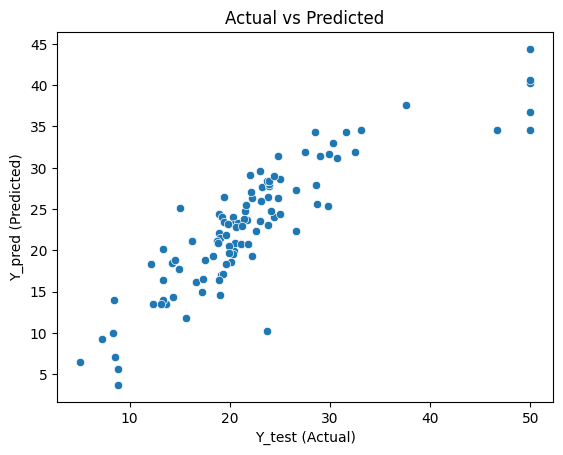

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=Y_test, y=Y_pred)
plt.xlabel("Y_test (Actual)")
plt.ylabel("Y_pred (Predicted)")
plt.title("Actual vs Predicted")
plt.show()

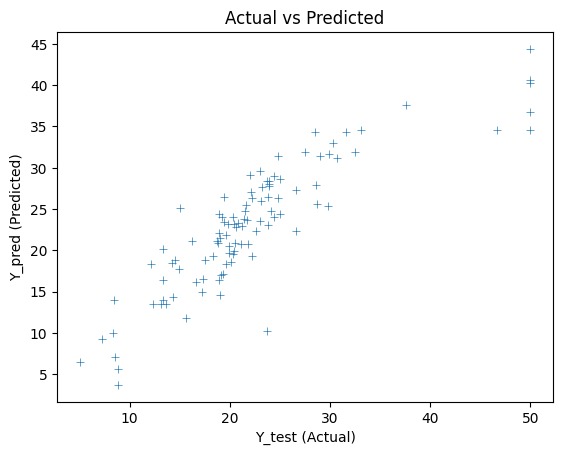

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=Y_test, y=Y_pred, marker="+")
plt.xlabel("Y_test (Actual)")
plt.ylabel("Y_pred (Predicted)")
plt.title("Actual vs Predicted")
plt.show()


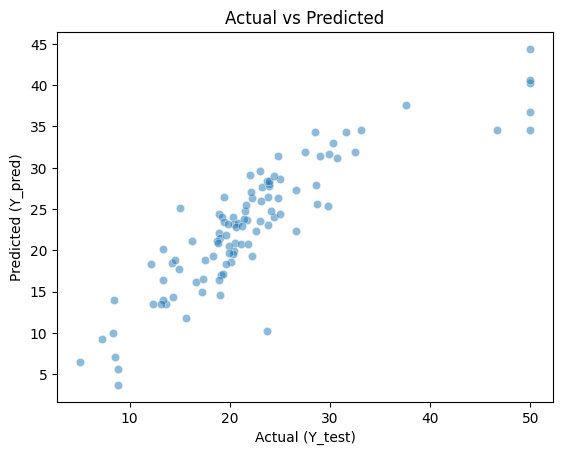

In [36]:
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.5)
plt.xlabel("Actual (Y_test)")
plt.ylabel("Predicted (Y_pred)")
plt.title("Actual vs Predicted")
plt.show()